# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from plotly import express as px
import pandas as pd
import plotly.graph_objects as go
#for data preprocessing
from sklearn.decomposition import PCA
import matplotlib.gridspec as gridspec

#for modeling
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

#filter warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Visualization on Synthetic data

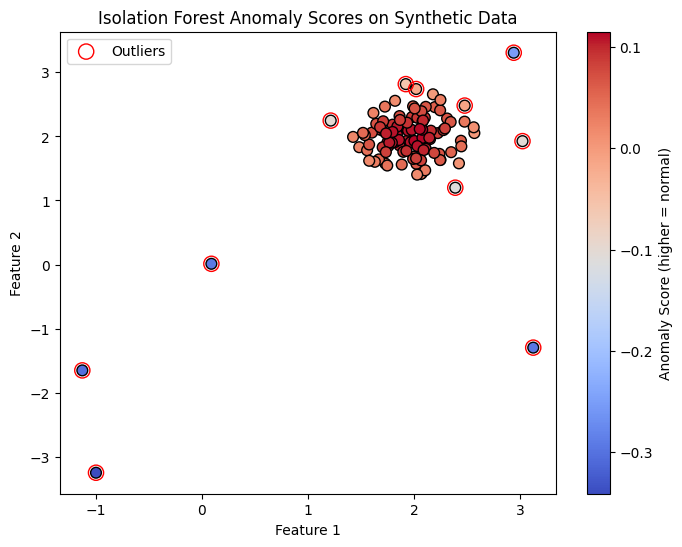

In [2]:


# Create synthetic 2D data: normal points in a cluster + a few outliers
rng = np.random.RandomState(42)
X_inliers = 0.3 * rng.randn(100, 2)  # normal cluster
X_outliers = rng.uniform(low=-4, high=4, size=(10, 2))  # outliers spread far away
X = np.r_[X_inliers + 2, X_outliers]  # shift cluster to (2,2)

# Fit Isolation Forest
iso = IsolationForest(contamination=0.1, random_state=42)
iso.fit(X)

# Predict anomaly scores (-1 for outlier, 1 for normal)
scores = iso.decision_function(X)  # anomaly score (the higher, the more normal)
preds = iso.predict(X)  # -1 = outlier, 1 = normal

# Plot data with anomaly score as color
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=scores, cmap='coolwarm', edgecolor='k', s=60)
plt.colorbar(label='Anomaly Score (higher = normal)')
plt.title("Isolation Forest Anomaly Scores on Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Highlight predicted outliers with red circle
outliers = X[preds == -1]
plt.scatter(outliers[:, 0], outliers[:, 1], facecolors='none', edgecolors='r', s=120, label='Outliers')

plt.legend()
plt.show()


In [3]:
px.scatter(X)

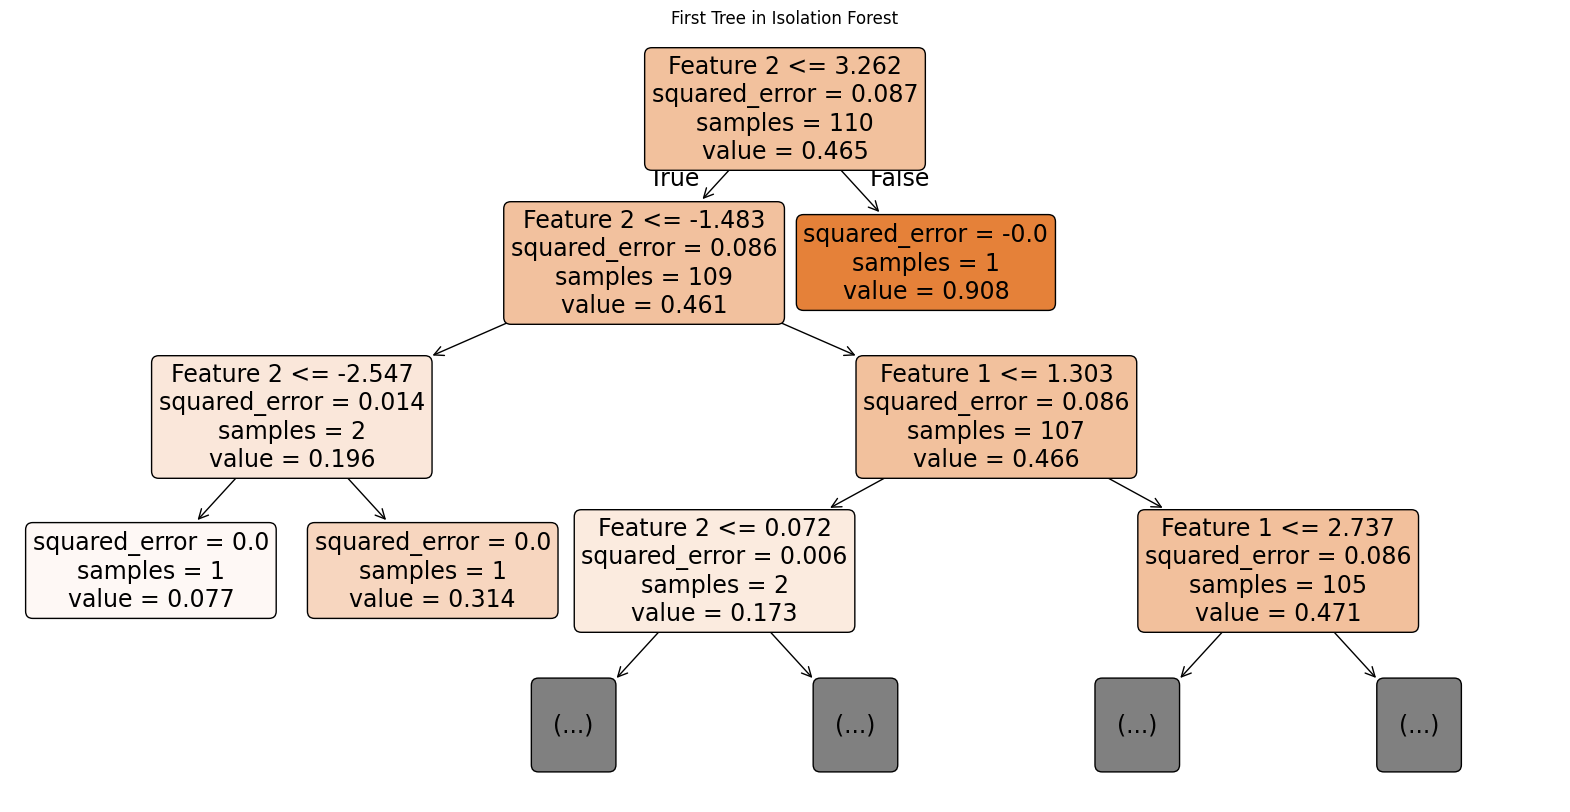

In [5]:
# prompt: plot one of trees in isolation forest

import matplotlib.pyplot as plt
# You can access the individual trees via the `estimators_` attribute
# Let's plot the first tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(iso.estimators_[78], filled=True, feature_names=["Feature 1", "Feature 2"], rounded=True, max_depth=3)
plt.title("First Tree in Isolation Forest")
plt.show()

# Credit card fraud data

In [6]:
data_path = "https://storage.googleapis.com/edulabs-public-datasets/creditcard.zip"
df = pd.read_csv(data_path)

In [7]:
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

cols= df[['Time_hour', 'Amount']]

scaler = StandardScaler()
scaled_cols = scaler.fit_transform(cols)

df['V29']=scaled_cols[:,0]
df['V30']=scaled_cols[:,1]

df.drop(columns=['Time','Time_hour', 'Amount'], inplace=True)

# Data Split

In [10]:


# Separate fraud (1) and normal (0)
normal = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

# Use only normal for training
X_train, X_val = train_test_split(normal.drop('Class', axis=1), test_size=0.1, random_state=42)

# Create a test set containing both normal and fraud
X_test = pd.concat([X_val, fraud.drop('Class', axis=1)])
y_test = np.array([0] * len(X_val) + [1] * len(fraud))

In [11]:
df['Class'].value_counts(normalize=True)

,proportion
Class,
0,0.998273
1,0.001727


# Isolation Forest

In [12]:
# Fit Isolation Forest
iso = IsolationForest(contamination=0.1)
iso.fit(X_train)

IsolationForest(contamination=0.1)

In [13]:
# scores = iso.decision_function(X_test)  # anomaly score (the higher, the more normal)
preds = iso.predict(X_test)  # -1 = outlier, 1 = normal

In [14]:
y_pred = preds == -1

In [15]:
confusion_matrix(y_test, y_pred)

array([[25564,  2868],
       [   58,   434]])

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     28432
           1       0.13      0.88      0.23       492

    accuracy                           0.90     28924
   macro avg       0.56      0.89      0.59     28924
weighted avg       0.98      0.90      0.93     28924



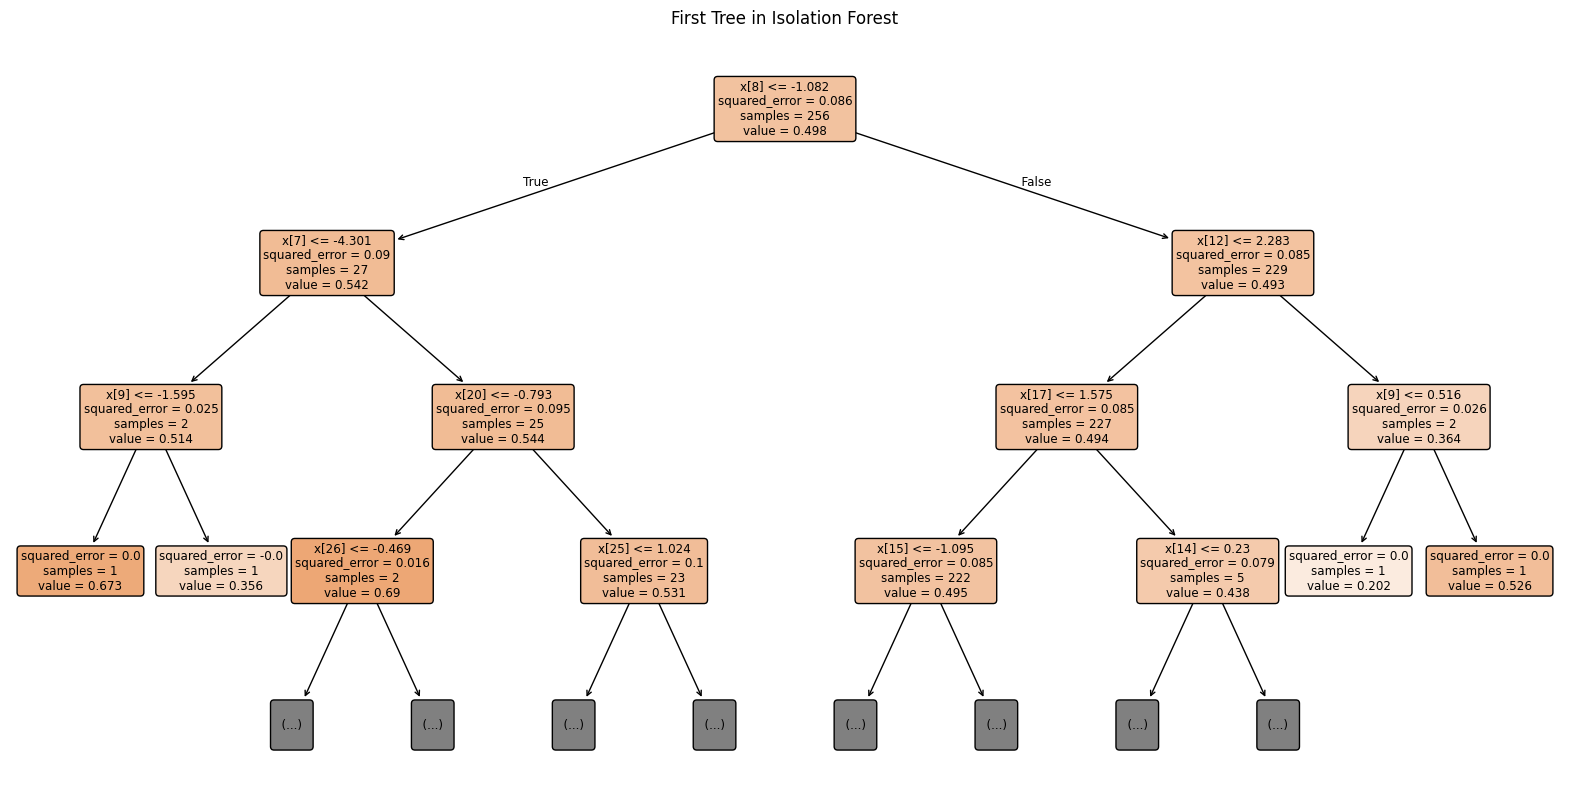

In [18]:
plt.figure(figsize=(20, 10))
plot_tree(iso.estimators_[68], filled=True, rounded=True, max_depth=3)
plt.title("First Tree in Isolation Forest")
plt.show()